In [5]:
import pandas as pd
import numpy as np

# Random seed for reproducibility
seed = 202
np.random.seed(seed)

# Import the train set and test set
train_data2 = pd.read_csv("trainset.csv", delimiter=",")
test_data2 = pd.read_csv("testset.csv", delimiter=",")

train_data = pd.read_csv("normalized_train_dataset.csv", delimiter=",")
test_data = pd.read_csv("normalized_test_dataset.csv", delimiter=",")

In [103]:
trainset = train_data
trainset = trainset.dropna()
print(train_data.shape)

trainset = trainset.iloc[np.random.permutation(len(trainset))]
trainset = trainset.reset_index(drop=True)

(9567, 35)


In [79]:
testset = test_data
testset = testset.dropna()
print(testset.shape)

testset = testset.iloc[np.random.permutation(len(testset))]
testset = testset.reset_index(drop=True)

(2051, 34)


In [7]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array = trainset.values
X = array[:,0:array.shape[1]-1]
X = np.asarray(X)
Y = array[:,array.shape[1]-1]
Y = np.asarray(Y)

# feature extraction
chi2_test = SelectKBest(score_func=chi2, k=4)
fit = chi2_test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# summarize selected features
print(features[0:5,:])
chi2_test.get_support(indices=True)
# keep selected feature names
features = [X[i] for i in chi2_test.get_support(indices=True)]
features

[6.296e+03 5.303e+00 6.113e+00 1.101e+01 4.195e-01 8.651e+00 7.961e-01
 1.196e+01 7.962e+01 1.091e+01 1.893e+06 1.978e+00 3.867e+01 3.972e+01
 3.934e+01 3.848e+01 7.948e+01 8.593e+01 1.252e+01 3.566e-01 3.684e-01
 2.202e+00 7.831e+00 1.825e-02 2.784e+00 4.078e+00 2.358e+01 2.826e+00
 1.584e-01 2.914e-01 4.053e+01 1.988e+02 3.724e+01 2.776e+02]
[[1.118e+04 8.502e+04 6.500e+01 7.600e+01]
 [9.927e+03 4.000e+01 1.500e+01 8.400e+01]
 [4.110e+02 4.600e+01 4.500e+01 8.400e+01]
 [2.770e+03 1.014e+04 2.500e+01 9.500e+01]
 [1.121e+04 2.804e+04 5.500e+01 6.000e+01]]


[array([1.118e+04, 0.000e+00, 1.551e-01, 3.815e-02, 1.000e+00, 7.552e-02,
        9.988e-04, 5.144e-03, 1.000e+00, 0.000e+00, 8.502e+04, 9.509e-02,
        0.000e+00, 0.000e+00, 2.502e-02, 7.535e-02, 6.136e-01, 7.698e-01,
        1.847e-02, 5.766e-04, 1.014e-01, 9.343e-05, 0.000e+00, 0.000e+00,
        7.217e-07, 6.168e-04, 3.092e-01, 0.000e+00, 1.279e-02, 1.367e-02,
        5.432e-01, 6.500e+01, 1.000e+00, 7.600e+01]),
 array([3.716e+03, 0.000e+00, 2.635e-01, 5.473e-02, 1.000e+00, 2.018e-01,
        2.372e-03, 1.121e-02, 0.000e+00, 0.000e+00, 7.002e+04, 3.589e-01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.473e-03, 7.532e-07, 1.166e-01, 7.427e-03, 0.000e+00, 0.000e+00,
        3.418e-03, 8.320e-02, 2.308e-01, 0.000e+00, 2.736e-03, 8.019e-03,
        5.433e-01, 5.500e+01, 1.200e+01, 7.000e+00]),
 array([2.000e+00, 0.000e+00, 1.551e-01, 1.051e-02, 1.000e+00, 2.474e-02,
        0.000e+00, 7.787e-03, 0.000e+00, 0.000e+00, 2.201e+04, 2.171e-02,
    

In [8]:
trainset.columns

Index(['ID', 'DeviceFlag4G', 'DataArpu', 'DataAllowanceContinuous',
       'DeviceFlagSmartphone', 'MonthlyVoiceTrafficCount',
       'MonthlySMSTrafficCount', 'MonthlyDataTraffic', 'CustomerGender',
       'CustomerExpatriate', 'ZipCode', 'ChurnScore',
       'AirportConnectionsDuration', 'AirportConnectionsCount',
       'StationConnectionsDuration', 'StationConnectionsCount',
       'ParkingConnectionsDuration', 'ParkingConnectionsCount',
       'File-Transfer', 'Games', 'Instant-Messaging-Applications', 'Mail',
       'Music-Streaming', 'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications', 'CustomerAge', 'Region', 'Province', 'Product'],
      dtype='object')

In [138]:
def features_labels_split(data):
    
    features = data[['ID', 'DataAllowanceContinuous', 'MonthlyDataTraffic', 'CustomerGender',
                     'CustomerExpatriate', 'ZipCode', 'Web-Applications', 'CustomerAge', 'Region', 'Province']]
    if('Product' in data.columns):
        labels = data['Product']
        return features, labels
    return features

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def standardize_features(features):

    scaler = StandardScaler().fit(features)
    features = scaler.transform(features)
    return features

In [16]:
def train_test_validation_split(features, labels, val_samples, test_samples):

    features = np.asarray(features)
    labels =np.asarray(labels)
    
    X_test = features[0:test_samples]
    y_test = labels[0:test_samples]

    X_val = features[test_samples:test_samples + val_samples]
    y_val = labels[test_samples:test_samples + val_samples]

    X_train = features[test_samples + val_samples:]
    y_train = labels[test_samples + val_samples:]

    return X_train, X_test, X_val, y_train, y_test, y_val

In [17]:
train_feat, train_label = features_labels_split(train_data)

In [18]:
num_val_samples = 0
num_test_samples = 616
X_train, X_test, X_val, y_train, y_test, y_val = train_test_validation_split(train_feat, train_label, num_val_samples, num_test_samples)

In [9]:
train_data.shape

(9567, 35)

In [58]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into X and y
array = train_data.values
X = array[:,0:array.shape[1]-1]
X = np.asarray(X)
Y = array[:,array.shape[1]-1]
Y = np.asarray(Y)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-mlogloss:1.33533
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.2933
[2]	validation_0-mlogloss:1.25687
[3]	validation_0-mlogloss:1.22597
[4]	validation_0-mlogloss:1.19952
[5]	validation_0-mlogloss:1.17636
[6]	validation_0-mlogloss:1.15704
[7]	validation_0-mlogloss:1.13955
[8]	validation_0-mlogloss:1.12428
[9]	validation_0-mlogloss:1.11111
[10]	validation_0-mlogloss:1.09831
[11]	validation_0-mlogloss:1.08769
[12]	validation_0-mlogloss:1.07857
[13]	validation_0-mlogloss:1.06932
[14]	validation_0-mlogloss:1.06215
[15]	validation_0-mlogloss:1.05481
[16]	validation_0-mlogloss:1.04909
[17]	validation_0-mlogloss:1.04384
[18]	validation_0-mlogloss:1.03877
[19]	validation_0-mlogloss:1.03358
[20]	validation_0-mlogloss:1.0297
[21]	validation_0-mlogloss:1.02558
[22]	validation_0-mlogloss:1.02234
[23]	validation_0-mlogloss:1.01876
[24]	validation_0-mlogloss:1.01564
[25]	validation_0-mlogloss:1.0133
[26]	validation_0-mlogloss:1.01094

C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


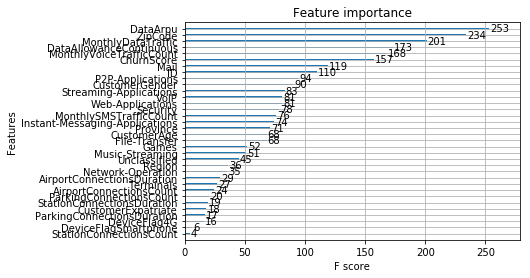

In [170]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import matplotlib.pyplot as plt
# split data into X and y
X = trainset.drop('Product', 1)
Y = trainset['Product']
# fit model on training data
model = XGBClassifier()
model.fit(X, Y)
# plot feature importance
plot_importance(model)
plt.show()

In [140]:
train_feat, train_label = features_labels_split(trainset)
test_feat = features_labels_split(testset)

In [141]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# split data into X and y
array = trainset.values
X = array[:,0:array.shape[1]-1]
X = np.asarray(X)
Y = array[:,array.shape[1]-1]
Y = np.asarray(Y)

X = trainset.drop('Product', 1)
Y = trainset['Product']

X = train_feat
Y = train_label

#num_val_samples = 0
#num_test_samples = 616
#X_train, X_test, X_val, y_train, y_test, y_val = train_test_validation_split(train_feat, train_label, num_val_samples, num_test_samples)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# grid search
model = XGBClassifier()

#learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
learning_rate = [0.2]
#n_estimators = [50, 100, 150, 200]
n_estimators = [50]
#max_depth = [2, 4, 6, 8]
max_depth = [4]
param_grid = dict(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.0s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


Best: -0.900926 using {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}
-0.900926 (0.017766) with: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}


In [142]:
grid_result, model, grid_search

(GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
        error_score='raise',
        estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1),
        fit_params=None, iid=True, n_jobs=-1,
        param_grid={'learning_rate': [0.2], 'max_depth': [4], 'n_estimators': [50]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_log_loss', verbose=1),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, 

In [146]:
y_pred = grid_result.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.00%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [117]:
array_test = testset.values
X_test_data = array_test[:,0:array_test.shape[1]]
X_test_data = np.asarray(X_test_data)
X_test_data, y_test.shape

(array([[9.890e+03, 1.000e+00, 7.754e-02, ..., 7.500e+01, 8.000e+00,
         5.600e+01],
        [8.873e+03, 1.000e+00, 1.547e-01, ..., 4.500e+01, 1.900e+01,
         1.060e+02],
        [6.680e+03, 1.000e+00, 1.086e-01, ..., 3.500e+01, 8.000e+00,
         1.020e+02],
        ...,
        [6.436e+03, 0.000e+00, 1.551e-01, ..., 3.500e+01, 1.400e+01,
         6.600e+01],
        [1.049e+04, 1.000e+00, 1.551e-01, ..., 4.500e+01, 1.500e+01,
         3.300e+01],
        [1.181e+04, 0.000e+00, 1.551e-01, ..., 7.500e+01, 1.900e+01,
         9.800e+01]]), (2033,))

In [148]:
y_pred_new_data = grid_result.predict(test_feat)
predictions = [round(value) for value in y_pred_new_data]
# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [155]:
from sklearn.metrics import f1_score
print("F1 score on unseen data: %.3f%%" % (f1_score(y_test, y_pred_new_data[0:2033], average='micro')*100))

F1 score on unseen data: 64.191%


In [151]:
y_pred_new_data.shape

(2051,)

In [156]:
submit = testset['ID']
submit = pd.DataFrame({'ID': submit})

pred = y_pred
pred = pd.DataFrame({'Product': y_pred_new_data})

product = []
product = pred.Product
product.replace({ 
    int(0) : 'Non-Customer', 
    int(1) : 'V-Bag', 
    int(2) : 'V-Pet', 
    int(3) : 'V-Auto'},
    inplace=True)

submit = submit.join(product)
submit

,ID,Product
0,9890,Non-Customer
1,8873,Non-Customer
2,6680,Non-Customer
3,8561,Non-Customer
4,6209,Non-Customer
5,11904,Non-Customer
6,5458,Non-Customer
7,9100,Non-Customer
8,9670,Non-Customer
9,5311,Non-Customer
